# Drilling Activity Prediction: Exploratory Data Analysis

- Data Overview
- Reindex dataframe
- Oil Variables Feature Engineering
- Gas Variables Feature Engineering
- Select Features for forecasting model
- Final Pre-processing Activities


**Note:**
Variable We want to Predict: **Oil Rig Count** and **Gas Rig Count** separately

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load specific forecasting tools
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
from statsmodels.tools.eval_measures import rmse

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Oil&Gas.csv',index_col=0,parse_dates=True)

#### Data Overview

In [3]:
df.head(5)

,oil_price,gas_price,oilrig_count,gasrig_count,totalrig_count,onshore_count,offshore_count,totalwell_count,oilwell_count,gaswell_count,...,oilstorage_amount_y,oilstoragechange_amount,oildaysofsupply,gasimports_amount,gasexports_amount,gasproduction_amount,gasconsumption_amount,gasstorage_amount,uspopulation,usemissions
date,,,,,,,,,,,,,,,,,,,,,
2021-10-25,84.64,5.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-22,84.53,5.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1044998.0,NaN,28.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-21,82.64,4.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-20,84.40,4.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-19,83.19,4.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.describe().transpose()[['count','mean','min','max','std']].round(2)

,count,mean,min,max,std
oil_price,9038.0,44.52,-36.98,145.31,28.73
gas_price,6222.0,4.15,0.00,23.86,2.18
oilrig_count,410.0,497.42,108.00,1596.00,361.41
gasrig_count,410.0,584.97,70.00,1585.00,388.99
totalrig_count,585.0,1389.25,250.00,4521.00,746.52
onshore_count,585.0,1285.06,237.00,4238.00,705.22
offshore_count,585.0,104.22,6.00,283.00,63.63
totalwell_count,456.0,3482.35,1268.00,8556.00,1654.50
oilwell_count,456.0,1363.82,291.00,3945.00,898.65
gaswell_count,456.0,1259.94,454.00,3200.00,626.67


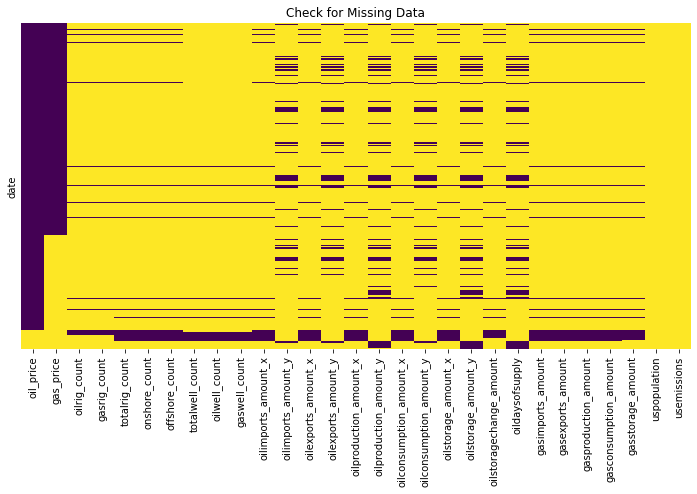

In [5]:
"""
There is a lot of missing data in this dataframe. Yellow means missing, purple means data.
"""

fig = plt.figure(figsize=(12,6))
ax = plt.axes()
ax.set_title('Check for Missing Data')
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis',ax=ax);

#### Reindex dataframe
- Make sure index is in datetime format after importing csv file
- Make sure dates are day by day all the way

In [6]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [7]:
print(f"""Date Range:
Minimum: {df.index.min()}
Maximum: {df.index.max()}""")

Date Range:
Minimum: 1960-01-01 00:00:00
Maximum: 2021-10-25 00:00:00


In [8]:
idx = pd.date_range(start='1960-01-01 00:00:00',end='2021-10-25 00:00:00',freq='d')

In [9]:
df = df.reindex(idx, fill_value=np.nan)

In [10]:
df.tail().sort_index(ascending=False)

,oil_price,gas_price,oilrig_count,gasrig_count,totalrig_count,onshore_count,offshore_count,totalwell_count,oilwell_count,gaswell_count,...,oilstorage_amount_y,oilstoragechange_amount,oildaysofsupply,gasimports_amount,gasexports_amount,gasproduction_amount,gasconsumption_amount,gasstorage_amount,uspopulation,usemissions
2021-10-25,84.64,5.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-22,84.53,5.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1044998.0,NaN,28.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10-21,82.64,4.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.shape

(22579, 29)

#### Oil Variables Feature Engineering
- Get count of remedial rigs aka rigs that are not for oil or gas.
- Merge monthly data columns with weekly data columns to increase data density
- Re-scale Oil Storage, merge data from Oil Storage Features.
- Interpolate features
- Drop extra features

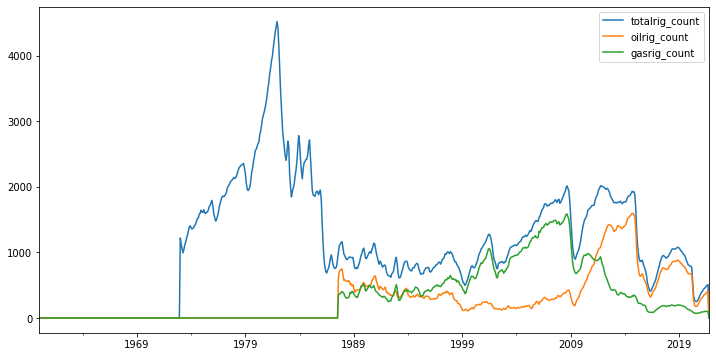

In [12]:
df[['totalrig_count','oilrig_count','gasrig_count']].resample(rule='M').mean().fillna(0).plot.line(figsize=(12,6));

In [13]:
df['remrig_count'] = df['totalrig_count'] - df['oilrig_count'] - df['gasrig_count']

In [14]:
df[['totalrig_count','oilrig_count','gasrig_count','remrig_count']].dropna()

,totalrig_count,oilrig_count,gasrig_count,remrig_count
1987-08-01,1003.0,626.0,352.0,25.0
1987-09-01,1101.0,713.0,364.0,24.0
1987-10-01,1124.0,727.0,377.0,20.0
1987-11-01,1152.0,746.0,386.0,20.0
1987-12-01,1162.0,746.0,403.0,13.0
...,...,...,...,...
2021-05-01,453.0,353.0,100.0,0.0
2021-06-01,464.0,367.0,97.0,0.0
2021-07-01,483.0,381.0,102.0,0.0
2021-08-01,501.0,400.0,100.0,1.0


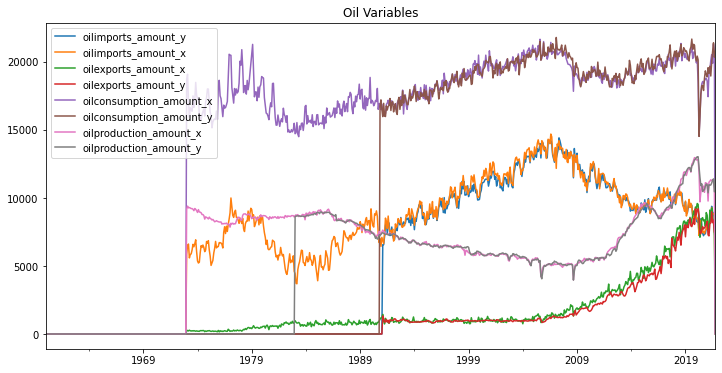

In [15]:
plot_list = ['oilimports_amount_y','oilimports_amount_x',
             'oilexports_amount_x','oilexports_amount_y',
             'oilconsumption_amount_x','oilconsumption_amount_y',
            'oilproduction_amount_x','oilproduction_amount_y']

df[plot_list].resample('M').mean().fillna(0).plot(figsize=(12,6),title='Oil Variables');

In [16]:
"""
Function will append two columns that contain same data at different times. 
Also, it will include data that is not in one feature but it is available in the other one.
"""
def mergecolumns(column1,column2,newcolumn='newcolumn'):
    date1 = df[column2].dropna().index.min() - pd.to_timedelta('1 day')
    date2 = df[column2].dropna().index.min()
    df[newcolumn] = df[column1][:date1].append(df[column2][date2:])
    filtered_data = df[[newcolumn,column1]].loc[(-df[column1].isna()) & (df[newcolumn].isna()),column1]
    df[newcolumn].loc[filtered_data.index,] = filtered_data.values

In [17]:
mergecolumns('oilimports_amount_x','oilimports_amount_y','oilimports')
mergecolumns('oilexports_amount_x','oilexports_amount_y','oilexports')
mergecolumns('oilconsumption_amount_x','oilconsumption_amount_y','oilconsumption')
mergecolumns('oilproduction_amount_x','oilproduction_amount_y','oilproduction')

In [18]:
df[['oilimports','oilimports_amount_x','oilimports_amount_y']].describe()

,oilimports,oilimports_amount_x,oilimports_amount_y
count,2136.000000,585.000000,1603.000000
mean,10071.030379,9149.604550,10420.676232
std,2120.527310,2476.540502,1854.460564
min,3689.513000,3689.513000,5775.000000
25%,8651.250000,7296.887000,9112.500000
50%,10011.500000,9092.258000,10227.000000
75%,11555.250000,11002.517000,11717.000000
max,15217.000000,14696.613000,15217.000000


<AxesSubplot:title={'center':'Compare Imports curves with Merged curve'}>

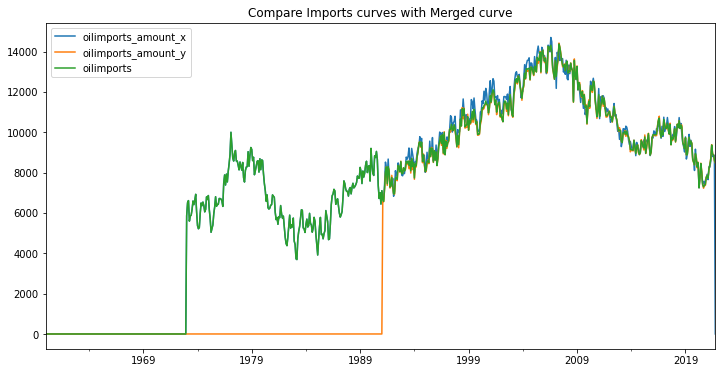

In [19]:
df[['oilimports_amount_x','oilimports_amount_y','oilimports']].resample('M').mean().fillna(0).plot(figsize=(12,6),title='Compare Imports curves with Merged curve')

<AxesSubplot:title={'center':'Oil Storage'}>

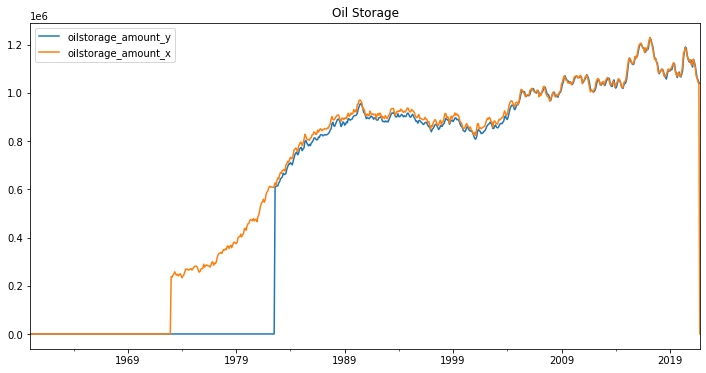

In [20]:
"""
Oil Storage Y is in Thousand Barrels
Oil Storage X is in Million Barrels

We will convert Oil Storage X in Thousand Barrels
"""

df['oilstorage_amount_y'].resample('M').mean().fillna(0).plot(figsize=(12,6),title='Oil',legend=True)
(df['oilstorage_amount_x'].apply(lambda x: x*1000)).resample('M').mean().fillna(0).plot(figsize=(12,6),title='Oil Storage',legend=True)

In [21]:
df['oilstorage_amount_x'] = df['oilstorage_amount_x'].apply(lambda x: x*1000)
mergecolumns('oilstorage_amount_x','oilstorage_amount_y','oilstorage')

In [22]:
"""Interpolate Features
"""
oil_list = ['oil_price','oilrig_count', 'gasrig_count',
       'totalrig_count', 'totalwell_count',
       'oilwell_count','oilstoragechange_amount',
       'oildaysofsupply', 'uspopulation', 'usemissions', 'remrig_count', 'oilimports',
       'oilexports', 'oilconsumption', 'oilproduction', 'oilstorage']

for feature in oil_list:
    df[feature] = df[feature].interpolate()

In [23]:
df[oil_list].describe().transpose()[['count','mean','min','max','std']].round(2)

,count,mean,min,max,std
oil_price,13081.0,44.56,-36.98,145.31,28.74
oilrig_count,12505.0,497.03,108.00,1596.00,360.41
gasrig_count,12505.0,583.81,70.00,1585.00,388.89
totalrig_count,17830.0,1387.64,250.00,4521.00,745.98
totalwell_count,17830.0,3412.86,1268.00,8556.00,1458.55
oilwell_count,17830.0,1367.11,291.00,3945.00,789.73
oilstoragechange_amount,14908.0,1108.49,-34924.00,48553.00,9725.76
oildaysofsupply,14277.0,23.43,16.10,42.00,4.05
uspopulation,22579.0,257168.32,180671.00,328330.00,45607.99
usemissions,15274.0,2278.29,1978.17,2594.01,155.42


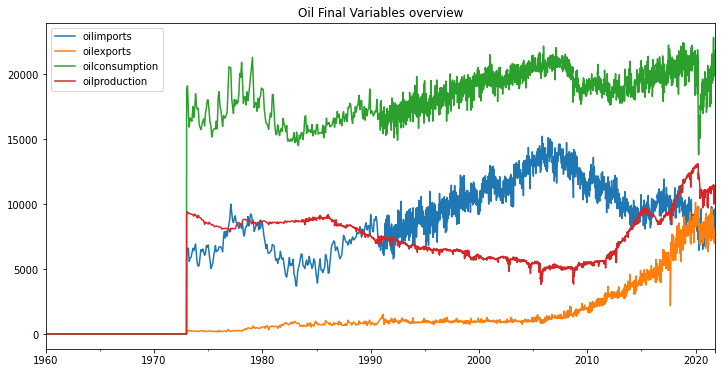

In [24]:
plot_list = ['oilimports','oilexports','oilconsumption','oilproduction']
df[plot_list].resample('D').mean().fillna(0).plot(figsize=(12,6),title='Oil Final Variables overview');

In [25]:
df.drop(columns=['oilimports_amount_x',
       'oilimports_amount_y', 'oilexports_amount_x', 'oilexports_amount_y',
       'oilproduction_amount_x', 'oilproduction_amount_y',
       'oilconsumption_amount_x', 'oilconsumption_amount_y',
       'oilstorage_amount_x', 'oilstorage_amount_y'], axis=1, inplace=True)

#### Gas Variables Feature Engineering
- Interpolate Variables
- Evaluate Features

In [26]:
gas_list = ['gas_price','gasrig_count',
       'onshore_count', 'offshore_count', 'gaswell_count', 
       'gasimports_amount', 'gasexports_amount',
       'gasproduction_amount', 'gasconsumption_amount', 'gasstorage_amount']

for feature in gas_list:
    df[feature] = df[feature].interpolate()

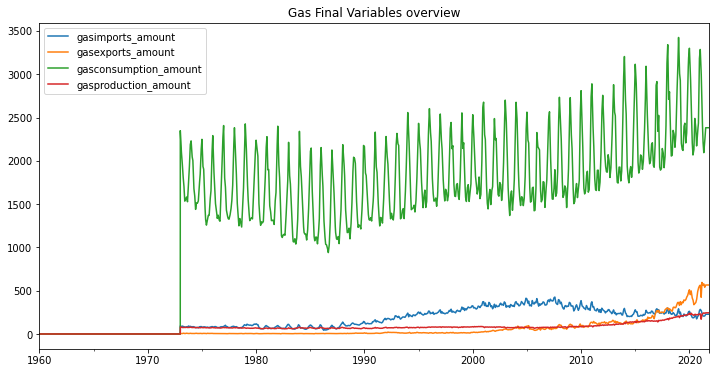

In [27]:
plot_list = ['gasimports_amount','gasexports_amount','gasconsumption_amount','gasproduction_amount']
df[plot_list].resample('D').mean().fillna(0).plot(figsize=(12,6),title='Gas Final Variables overview');

--- Pending backcasting to fill missing data in the past --- For now, will just dropna values to continue with project

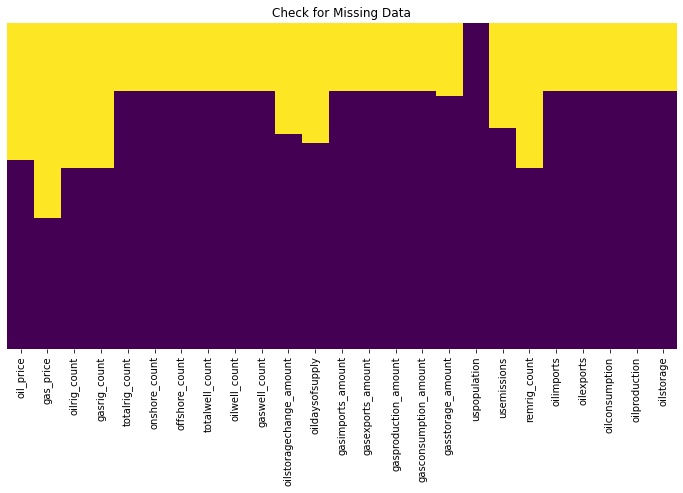

In [28]:
fig = plt.figure(figsize=(12,6))
ax = plt.axes()
ax.set_title('Check for Missing Data')
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis',ax=ax);

In [29]:
df = df.dropna()
df.shape

(9058, 25)

#### Select Features for forecasting model
- Correlation Plot
- Granger Causality Test
- Select features for Oil Counts
- Select features for Gas Rig Count

In [30]:
df.corr()['oilrig_count'].sort_values(ascending=False)

oilrig_count               1.000000
oil_price                  0.668226
oilwell_count              0.661305
onshore_count              0.576134
uspopulation               0.566449
totalrig_count             0.534911
oilstorage                 0.434567
oilexports                 0.361687
oilproduction              0.331508
gasproduction_amount       0.302828
gasconsumption_amount      0.272281
gasexports_amount          0.237308
gasstorage_amount          0.217094
oildaysofsupply            0.178339
totalwell_count            0.150101
remrig_count               0.090129
oilstoragechange_amount   -0.001197
oilconsumption            -0.159903
gas_price                 -0.197755
gaswell_count             -0.201369
gasrig_count              -0.364592
oilimports                -0.379046
offshore_count            -0.477353
gasimports_amount         -0.525591
usemissions               -0.696405
Name: oilrig_count, dtype: float64

In [31]:
df.corr()['gasrig_count'].sort_values(ascending=False)

gasrig_count               1.000000
oilimports                 0.882810
gasimports_amount          0.838126
gaswell_count              0.738234
gas_price                  0.732487
totalrig_count             0.591709
onshore_count              0.547746
remrig_count               0.494310
offshore_count             0.471420
totalwell_count            0.471094
usemissions                0.386313
oilconsumption             0.241871
oil_price                  0.169827
oilstoragechange_amount    0.064229
gasstorage_amount         -0.198323
oilwell_count             -0.280672
oilrig_count              -0.364592
gasconsumption_amount     -0.441030
oilstorage                -0.457413
uspopulation              -0.506626
gasexports_amount         -0.622342
oildaysofsupply           -0.677238
oilexports                -0.733829
gasproduction_amount      -0.759580
oilproduction             -0.826225
Name: gasrig_count, dtype: float64

In [32]:
oil_list = ['oil_price','oilrig_count',
       'totalrig_count', 'oilwell_count',
       'onshore_count','uspopulation', 'usemissions','oilimports',
       'oilexports','oilproduction', 'oilstorage', 'oilconsumption']


gas_list = ['gas_price','gasrig_count', 'remrig_count', 'totalrig_count',
       'onshore_count', 'offshore_count', 'gaswell_count', 'totalwell_count',
       'gasimports_amount', 'oilimports', 'gasexports_amount',
       'gasproduction_amount', 'gasconsumption_amount', 'oilproduction',
       'uspopulation', 'usemissions']

df_oil = df[oil_list]
df_gas = df[gas_list]

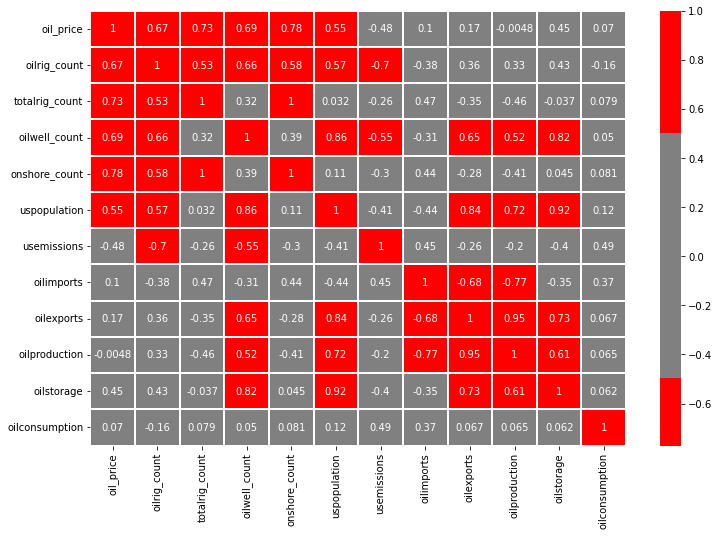

In [33]:
fig = plt.figure(figsize=(12,8))
sns.heatmap(df_oil.corr(),cmap=['red','gray','gray','red'],annot=True,linecolor='white',linewidth=2,center=0);

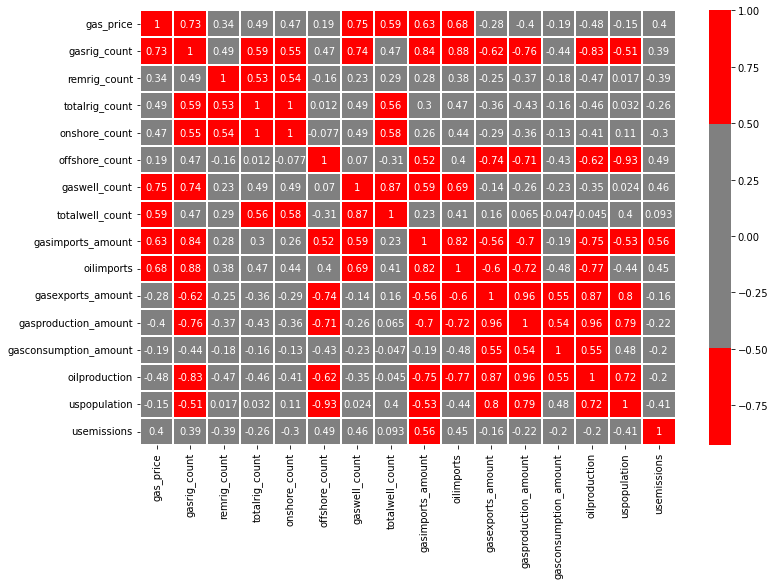

In [34]:
fig = plt.figure(figsize=(12,8))
sns.heatmap(df_gas.corr(),cmap=['red','gray','gray','red'],annot=True,linecolor='white',linewidth=2,center=0);

In [35]:
"""
Granger Causality Test:

The Granger causality test is a a hypothesis test to determine if one time series is useful in forecasting another.
While it is fairly easy to measure correlations between series - when one goes up the other goes up, and vice versa - 
it's another thing to observe changes in one series correlated to changes in another after a consistent amount of time. 
This may indicate the presence of causality, that changes in the first series influenced the behavior of the second. 
However, it may also be that both series are affected by some third factor, just at different rates. 
Still, it can be useful if changes in one series can predict upcoming changes in another, whether there is causality or not. 
In this case we say that one series "Granger-causes" another.

In the case of two series,  𝑦  and  𝑥 , the null hypothesis is that lagged values of  𝑥  do not explain variations in  𝑦 .
In other words, it assumes that  𝑥𝑡  doesn’t Granger-cause  𝑦𝑡 .

The stattools grangercausalitytests function offers four tests for granger non-causality of 2 timeseries

Null Hupothesis: There is no causality between the variables
if p value < 0.05 --> We reject the null hypothesis. We could say there is no sufficient proof to say there is no causality
if p value > 0.05 --> We take the null hypothesis. There is sufficient evidence to say there is no causality

"""


for value in oil_list:
    print(f' \n***Test Oil Rig Count Versus {value}***')
    grangercausalitytests(df_oil.resample('MS').mean().sort_index(ascending=False)[[value,'oilrig_count']],maxlag=5);

 
***Test Oil Rig Count Versus oil_price***

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=22.6380 , p=0.0000  , df_denom=294, df_num=1
ssr based chi2 test:   chi2=22.8690 , p=0.0000  , df=1
likelihood ratio test: chi2=22.0313 , p=0.0000  , df=1
parameter F test:         F=22.6380 , p=0.0000  , df_denom=294, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=21.5183 , p=0.0000  , df_denom=291, df_num=2
ssr based chi2 test:   chi2=43.7760 , p=0.0000  , df=2
likelihood ratio test: chi2=40.8264 , p=0.0000  , df=2
parameter F test:         F=21.5183 , p=0.0000  , df_denom=291, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=14.5934 , p=0.0000  , df_denom=288, df_num=3
ssr based chi2 test:   chi2=44.8443 , p=0.0000  , df=3
likelihood ratio test: chi2=41.7461 , p=0.0000  , df=3
parameter F test:         F=14.5934 , p=0.0000  , df_denom=288, df_num=3

Granger Causality
number of lags (no zero) 4
ssr 

likelihood ratio test: chi2=8.2508  , p=0.0162  , df=2
parameter F test:         F=4.1128  , p=0.0173  , df_denom=291, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=4.7675  , p=0.0029  , df_denom=288, df_num=3
ssr based chi2 test:   chi2=14.6501 , p=0.0021  , df=3
likelihood ratio test: chi2=14.2980 , p=0.0025  , df=3
parameter F test:         F=4.7675  , p=0.0029  , df_denom=288, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.7597  , p=0.0054  , df_denom=285, df_num=4
ssr based chi2 test:   chi2=15.5136 , p=0.0037  , df=4
likelihood ratio test: chi2=15.1182 , p=0.0045  , df=4
parameter F test:         F=3.7597  , p=0.0054  , df_denom=285, df_num=4

Granger Causality
number of lags (no zero) 5
ssr based F test:         F=3.1383  , p=0.0090  , df_denom=282, df_num=5
ssr based chi2 test:   chi2=16.3038 , p=0.0060  , df=5
likelihood ratio test: chi2=15.8664 , p=0.0072  , df=5
parameter F test:         F=3.1383  , p

In [36]:
for value in gas_list:
    print(f' \n***Test Gas Rig Count Versus {value}***')
    grangercausalitytests(df_gas.resample('MS').mean().sort_index(ascending=False)[[value,'gasrig_count']],maxlag=5);

 
***Test Gas Rig Count Versus gas_price***

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=23.7709 , p=0.0000  , df_denom=294, df_num=1
ssr based chi2 test:   chi2=24.0135 , p=0.0000  , df=1
likelihood ratio test: chi2=23.0920 , p=0.0000  , df=1
parameter F test:         F=23.7709 , p=0.0000  , df_denom=294, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=12.3670 , p=0.0000  , df_denom=291, df_num=2
ssr based chi2 test:   chi2=25.1590 , p=0.0000  , df=2
likelihood ratio test: chi2=24.1467 , p=0.0000  , df=2
parameter F test:         F=12.3670 , p=0.0000  , df_denom=291, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=8.5169  , p=0.0000  , df_denom=288, df_num=3
ssr based chi2 test:   chi2=26.1718 , p=0.0000  , df=3
likelihood ratio test: chi2=25.0752 , p=0.0000  , df=3
parameter F test:         F=8.5169  , p=0.0000  , df_denom=288, df_num=3

Granger Causality
number of lags (no zero) 4
ssr 


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=21.1051 , p=0.0000  , df_denom=294, df_num=1
ssr based chi2 test:   chi2=21.3204 , p=0.0000  , df=1
likelihood ratio test: chi2=20.5899 , p=0.0000  , df=1
parameter F test:         F=21.1051 , p=0.0000  , df_denom=294, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=23.2890 , p=0.0000  , df_denom=291, df_num=2
ssr based chi2 test:   chi2=47.3784 , p=0.0000  , df=2
likelihood ratio test: chi2=43.9482 , p=0.0000  , df=2
parameter F test:         F=23.2890 , p=0.0000  , df_denom=291, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=10.8877 , p=0.0000  , df_denom=288, df_num=3
ssr based chi2 test:   chi2=33.4571 , p=0.0000  , df=3
likelihood ratio test: chi2=31.6921 , p=0.0000  , df=3
parameter F test:         F=10.8877 , p=0.0000  , df_denom=288, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=9.8007  , p=0.0000  

In [37]:
oil_list = ['oilrig_count',
           'oil_price','oilconsumption','oilproduction', 'oilstorage']


gas_list = ['gasrig_count', 
            'gas_price', 'gaswell_count',
       'gasimports_amount', 'gasconsumption_amount']

df_oil = df[oil_list]
df_gas = df[gas_list]

#### Final Pre-processing Activities
- Stationarity Test (Augmented Dicky Fuller Test)
- Perform Transformations (Apply differencing to features to make sure data is stationary)

In [38]:
"""
A stationary time series is one whose properties do not depend on the time at which the series is observed.
Thus, time series with trends, or with seasonality, are not stationary — 
the trend and seasonality will affect the value of the time series at different times. 
On the other hand, a white noise series is stationary — it does not matter when you observe it, 
it should look much the same at any point in time.

Forecasting models like VAR and VARMA assume stationarity. Therefore, we need to transform data to stationary. ADF test will 
help us identify whether features are stationary or not.

"""

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [39]:
for feature in oil_list:
    adf_test(df_oil[feature],title=str(feature))
    print('\n')

Augmented Dickey-Fuller Test: oilrig_count
ADF test statistic        -2.232796
p-value                    0.194559
# lags used                1.000000
# observations          9056.000000
critical value (1%)       -3.431072
critical value (5%)       -2.861859
critical value (10%)      -2.566940
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


Augmented Dickey-Fuller Test: oil_price
ADF test statistic        -2.213077
p-value                    0.201533
# lags used               38.000000
# observations          9019.000000
critical value (1%)       -3.431075
critical value (5%)       -2.861861
critical value (10%)      -2.566941
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


Augmented Dickey-Fuller Test: oilconsumption
ADF test statistic        -5.155186
p-value                    0.000011
# lags used               34.000000
# observations  

In [40]:
"""
Differencing: compute the differences between consecutive observations.
"""
dfoil_transformed = df_oil.diff(periods=2)

In [41]:
dfoil_transformed = dfoil_transformed.dropna()

In [42]:
for feature in oil_list:
    adf_test(dfoil_transformed[feature],title=str(feature))
    print('\n')

Augmented Dickey-Fuller Test: oilrig_count
ADF test statistic     -7.221717e+00
p-value                 2.102962e-10
# lags used             3.800000e+01
# observations          9.017000e+03
critical value (1%)    -3.431075e+00
critical value (5%)    -2.861861e+00
critical value (10%)   -2.566941e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


Augmented Dickey-Fuller Test: oil_price
ADF test statistic     -1.323356e+01
p-value                 9.477736e-25
# lags used             3.800000e+01
# observations          9.017000e+03
critical value (1%)    -3.431075e+00
critical value (5%)    -2.861861e+00
critical value (10%)   -2.566941e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


Augmented Dickey-Fuller Test: oilconsumption
ADF test statistic       -20.940280
p-value                    0.000000
# lags used               37.000000
# observations      

In [43]:
dfoil_transformed.shape

(9056, 5)

In [44]:
dfgas_transformed = df_gas.diff(periods=2)
dfgas_transformed = dfgas_transformed.dropna()

In [45]:
for feature in gas_list:
    adf_test(dfgas_transformed[feature],title=str(feature))
    print('\n')

Augmented Dickey-Fuller Test: gasrig_count
ADF test statistic     -5.861351e+00
p-value                 3.404547e-07
# lags used             3.800000e+01
# observations          9.017000e+03
critical value (1%)    -3.431075e+00
critical value (5%)    -2.861861e+00
critical value (10%)   -2.566941e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


Augmented Dickey-Fuller Test: gas_price
ADF test statistic     -1.782734e+01
p-value                 3.143436e-30
# lags used             3.800000e+01
# observations          9.017000e+03
critical value (1%)    -3.431075e+00
critical value (5%)    -2.861861e+00
critical value (10%)   -2.566941e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


Augmented Dickey-Fuller Test: gaswell_count
ADF test statistic     -9.404007e+00
p-value                 6.079949e-16
# lags used             3.700000e+01
# observations    

In [46]:
dfgas_transformed.shape

(9056, 5)

In [ ]:
df_oil.to_csv('dfoil.csv')
dfoil_transformed.to_csv('dfoil_transformed.csv')

df_gas.to_csv('dfgas.csv')
dfgas_transformed.to_csv('dfgas_transformed.csv')